In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
test = pd.read_csv('test_df.csv')
train = pd.read_csv('train_df.csv')

In [3]:
to_keep = ['domain', 'num_funding_rounds',
       'total_funding_usd', 'founded_on', 'last_funding_on',
       'employee_count', 'b_round_age', 'acquired_age',
       'target']
data_final_train = train[to_keep]
data_final_test = test[to_keep]

In [4]:
y = data_final_train['target']
X = data_final_train.drop(['target'], axis = 1)

test_y = data_final_test['target']
test_X = data_final_test.drop(['target'], axis = 1)

In [5]:
X.head(5)

,domain,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,employee_count,b_round_age,acquired_age
0,1,0.0,0.0,2017.0,0.0,0,0.0,0.0
1,1,0.0,0.0,2017.0,0.0,1,0.0,0.0
2,1,0.0,0.0,2014.0,0.0,1,0.0,0.0
3,1,1.0,0.0,2018.0,2018.0,1,0.0,0.0
4,1,0.0,0.0,2013.0,0.0,0,0.0,0.0


In [19]:
param_grid = {'C': [0.05, 0.1, 0.5, 1, 5, 10, 50],
              'gamma': [1/len(X.columns)]} 

 
gridsearch = GridSearchCV(model, param_grid, scoring='f1', cv=5, verbose = 3)
gridsearch.fit(X, y)

In [20]:
print("Tuned Hyperparameters :", gridsearch.best_params_)
print("F1 :", gridsearch.best_score_)

In [5]:
clf = SVC(C = 5, gamma = 0.125)
clf.fit(test_X, test_y)

SVC(C=5, gamma=0.125)

In [6]:
y_pred = clf.predict(test_X)

In [7]:
print(f1_score(test_y, y_pred))

0.9376782077393077

In [8]:
print(clf.score(test_X, test_y))

0.9927503269460397

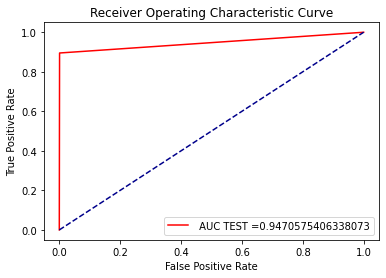

In [14]:
test_fpr, test_tpr, te_thresholds = roc_curve(test_y, y_pred)

plt.plot(test_fpr, test_tpr,color='red', label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.savefig('svm.png')
plt.show()

In [13]:
print('SVM: ROC AUC=%.3f' % (auc(test_fpr, test_tpr)))

Logistic: ROC AUC=0.947
